# Teste Rocketmat - Data Science para Recursos Humanos - Bruno César dos Santos 

O objetivo deste projeto é analisar por que os funcionários estão saindo prematuramente? Os campos do conjunto de dados incluem:

* Última avaliação
* Número de projetos
* Média de horas mensais
* Tempo de permanência na empresa
* Se sofreu um acidente de trabalho
* Se teve uma promoção nos últimos 5 anos
* Departamentos
* Salário

Os dados estão disponibilizados no  seguinte endereço do 'https://www.kaggle.com/krismurphy01/data-lab. 



In [2]:
# importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# installing scikit-plot
!pip install -q scikit-plot

%matplotlib inline

# importando recursos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import io
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit, cross_val_score, cross_val_predict

from sklearn.linear_model import LogisticRegression

## Origem dos dados

In [3]:
# importando os dados
from google.colab import files
data_to_load = files.upload()
df = pd.read_csv(io.BytesIO(data_to_load['HR_Engagement_Sat_Sales_UpdatedV4.0.csv']))

Saving HR_Engagement_Sat_Sales_UpdatedV4.0.csv to HR_Engagement_Sat_Sales_UpdatedV4.0.csv


In [ ]:
# verificando as primeiras entradas
df.head()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,sales,low,M,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10


## Dicionário de variáveis

In [ ]:
# verificando o tamanho do dataset
print("Informações Sobre o Dataset")
print("Variáveis:\t {}".format(df.shape[1]))
print("Entradas:\t {}\n".format(df.shape[0]))
print("O dataset apresenta dados ausentes:\n")

# identificando os tipos das variáveis
display(df.info())

Informações Sobre o Dataset
Variáveis:	 62
Entradas:	 14999

O dataset apresenta dados ausentes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     14999 non-null  int64  
 1   Name                                   14997 non-null  object 
 2   Department                             14999 non-null  object 
 3   GEO                                    14999 non-null  object 
 4   Role                                   14999 non-null  object 
 5   Rising_Star                            21 non-null     float64
 6   Will_Relocate                          14999 non-null  int64  
 7   Critical                               480 non-null    float64
 8   Trending Perf                          14999 non-null  int64  
 9   Talent_Level                           1

None

In [ ]:
# distribuição estatística das variáveis
df.describe()

,ID,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
count,14999.000000,21.0,14999.000000,480.0,14999.0,14999.0,14999.0,14999.000000,14871.0,14871.000000,14871.000000,14871.000000,14871.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1713.0,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,7596.000000,4865.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,1.0,0.499833,1.0,3.0,6.0,6.0,0.617321,3.0,2.731962,3.731962,2.731962,3.943649,2.839723,4.367691,3.367691,3.761784,3.973598,4.047670,4.285752,3.761917,3.523835,2.523835,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,5.0,0.021268,18.553904,3.001867,3.014468,3.005800,3.002867,2.141343,2.116274,1.998400,1.990066,0.707741,0.908530,2.156010,2.987199,2.144010,2.999067,2.987066,2.979532,1.676245,2.998533,3.005200,3.016934,3406.693246,77.967198,6.399360
std,4329.982679,0.0,0.500017,0.0,0.0,0.0,0.0,0.193841,0.0,0.681369,0.681369,0.681369,1.244511,0.776054,0.929979,0.929979,0.580834,1.367462,1.703696,1.277772,0.425924,0.851848,0.851848,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.0,0.144281,18.987335,1.413788,1.417319,1.418791,1.413008,1.023277,1.010454,0.865389,0.856232,0.454831,0.288306,1.032378,1.416793,1.030439,1.406128,1.412314,1.412579,0.865230,1.410058,1.410191,1.412225,1755.742272,7.252848,2.588091
min,1.000000,1.0,0.000000,1.0,3.0,6.0,6.0,0.400000,3.0,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,5.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,60.000000,1.000000
25%,3750.500000,1.0,0.000000,1.0,3.0,6.0,6.0,0.400000,3.0,3.000000,4.000000,3.000000,4.000000,2.000000,3.000000,2.000000,3.000000,2.000000,5.000000,5.000000,4.000000,4.000000,3.000000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,5.0,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1704.500000,75.000000,5.000000
50%,7500.000000,1.0,0.000000,1.0,3.0,6.0,6.0,0.800000,3.0,3.000000,4.000000,3.000000,4.000000,3.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,3.000000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,5.0,0.000000,9.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3376.000000,78.000000,7.000000
75%,11249.500000,1.0,1.000000,1.0,3.0,6.0,6

### Insights
Algumas informações básicas podem ser retiradas desta distribuição estatística, como por exemplo:

* O percentual médio de pessoas que saem da empresa é de 23.8% (left_Company)
* A média de talento da empresa é 6.0 (Talent_Level)
* A quantidade de horas trabalhadas no mês é de 201.05hs (average_montly_hours)
* Apenas 2% dos funcionários receberam promoção nos últimos 5 anos (promotion_last_5years)
* A média de anos de serviço dos funcionários na empresa é de 3.4 anos (time_spend_company)

In [ ]:
# distribuição estatística das variáveis categóricas
df.describe(include='O')

,Name,Department,GEO,Role,sales,salary,Gender
count,14997,14999,14999,14999,14999,14999,14999
unique,14997,6,9,7,10,3,2
top,CLAAR,IT,UK,Level 2-4,sales,low,F
freq,1,2500,1772,6889,4140,7316,7596


### Insights

* Mulheres são maioria na empresa com 7596 funcionárias (Gender)
* A maioria dos funcionários recebe salário considerado baixo (salary).
* A maioria dos funcionários trabalha no UK (GEO).
* O emprego mais comum na empresa é Level 2-4 (Role).

## Visualização

In [ ]:
import plotly.graph_objs as go

dfSalario = df.groupby('salary').size().sort_values(ascending=False)

fig = go.Figure(data=[go.Bar(name='Salário', x=dfSalario.index, y=dfSalario.values, text=dfSalario.values, textposition='auto')])
fig.update_layout(showlegend=True, height=400, width=600, title_text='Salário x Quantidade Funcionário',  xaxis_title="Tipos de salário", yaxis_title="Quantidade") 
fig.show()

In [ ]:
dfGender = df.groupby('Gender').size().sort_values(ascending=False)

fig = go.Figure(data=[go.Bar(name= 'Gênero', x=dfGender.index, y=dfGender.values, text=dfGender.values, textposition='auto')])
fig.update_layout(showlegend=True, height=400, width=600, title_text='Gênero x Quantidade Funcionário',  xaxis_title="Gênero", yaxis_title="Quantidade") 
fig.show()

In [ ]:
dfGEO = df.groupby('GEO').size().sort_values(ascending=False)

fig = go.Figure(data=[go.Bar(name= 'Países', x=dfGEO.index, y=dfGEO.values, text=dfGEO.values, textposition='auto')])
fig.update_layout(showlegend=True, height=400, width=600, title_text='Países x Quantidade Funcionário',  xaxis_title="Países", yaxis_title="Quantidade Funcionários") 
fig.show()

In [ ]:
dfaux = df.copy()
dfaux['left_Company_name'] = np.where(dfaux['left_Company']==0, 'Não', 'Sim')
dfLeft = dfaux.groupby('left_Company_name').size()

fig = go.Figure(data=[go.Pie(labels=dfLeft.index, values=dfLeft.values, pull=[0.0], hole=.3)])
fig.update_layout(showlegend=True, height=500, width=800, title_text='Percentual de Funcionários que saíram da Empresa') 
fig.show()

### Insights
Algumas informações básicas podem ser retiradas desta distribuição estatística, como por exemplo:

* Porque os funcionários estão saindo?

In [ ]:
sairam = df[df['left_Company']==1].mean()
naoSairam = df[df['left_Company']==0].mean()

In [ ]:
#Calcula o total geral do pais
dadosHorasTrabalhadas = {
    'Não Deixaram a Empresa': round(naoSairam['average_montly_hours']/30,2),
    'Deixaram a Empresa': round(sairam['average_montly_hours']/30,2)
    }

dadosPromocao = {
    'Não Deixaram a Empresa': round(naoSairam['promotion_last_5years'],2) * 100,
    'Deixaram a Empresa': round(sairam['promotion_last_5years'],2) * 100
    }

dfHorasTrabalhadas = pd.DataFrame(data=dadosHorasTrabalhadas,  index=[0])
dfPromocao = pd.DataFrame(data=dadosPromocao,  index=[0])


In [ ]:
fig = go.Figure(data=[go.Bar(name= 'Não Deixaram a Empresa', x=['Não Deixaram a Empresa'], y=dfHorasTrabalhadas['Não Deixaram a Empresa'], text=dfHorasTrabalhadas['Não Deixaram a Empresa'], textposition='auto'),
                      go.Bar(name= 'Deixaram a Empresa', x=['Deixaram a Empresa'], y=dfHorasTrabalhadas['Deixaram a Empresa'], text=dfHorasTrabalhadas['Deixaram a Empresa'], textposition='auto')
                      ])

fig.update_layout(showlegend=True, height=400, width=600, title_text='Horas trabalhadas por dia dos funcionários',  xaxis_title="", yaxis_title="Horas trabalhadas") 
fig.show()

Podemos concluir com o gráfico acima que: 
* Os funcionários que fizeram mais horas por dia na empresa tem mais chance de saírem.

In [ ]:
fig = go.Figure(data=[go.Bar(name= 'Não Deixaram a Empresa', x=['Não Deixaram a Empresa'], y=dfPromocao['Não Deixaram a Empresa'], text=dfPromocao['Não Deixaram a Empresa'], textposition='auto'),
                      go.Bar(name= 'Deixaram a Empresa', x=['Deixaram a Empresa'], y=dfPromocao['Deixaram a Empresa'], text=dfPromocao['Deixaram a Empresa'], textposition='auto')
                      ])

fig.update_layout(showlegend=True, height=400, width=600, title_text='Promoção nos últimos 5 anos',  xaxis_title="", yaxis_title="Percentual") 
fig.show()

Podemos concluir com o gráfico acima que: 
* Dos funcionários que estão na empresa 3% deles receberam promoção nos últimos 5 anos, enquanto do grupo que saiu 1% destes receberam promoção nos últimos 5 anos.

### Conclusões finais da Visualização

Se compararmos os que sairam com os que não sairam, podemos dizer: 
* que promoção nos últimos 5 anos (promotion_last_5years)
* quantidade de horas de trabalho (average_montly_hours)
* tempo gasto na empresa (time_spend_company)
* última_avaliação (last_evaluation)

São os principais motivos para a saída ou retenção do funcionário na empresa.

## Preparando os Dados para Machine Learning

Para inserir nossos dados em um modelo de Machine Learning precisamos trabalhá-los. Ao fazer o pré-processamento dos dados, vamos passar por duas etapas:

* Transformação de variáveis categóricas: Utilizaremos o **Label Encoder**, que transforma Strings em números representando categorias.


In [ ]:
#Função para retornar o percentual de dados ausentes do dataFrame
def missing_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("O DataFrame selecionado tem " + str(df.shape[1]) + " colunas.\n"      
            "Há " + str(mis_val_table_ren_columns.shape[0]) +
              " colunas com valores ausentes")
        return mis_val_table_ren_columns

#Função que preenche os dados ausentes com a média
def preencheMedia(data, features):
    for item in features:
        data[item] = data[item].fillna(data[item].mean())
    return data

In [ ]:
df_preProcessing = df.copy()
missing_values(df_preProcessing)

O DataFrame selecionado tem 62 colunas.
Há 11 colunas com valores ausentes


,Missing Values,% of Total Values
Rising_Star,14978,99.9
Critical,14519,96.8
CSR Factor,13286,88.6
Men_Leave,10134,67.6
Women_Leave,7403,49.4
EMP_Sat_OnPrem_1,128,0.9
EMP_Sat_OnPrem_2,128,0.9
EMP_Sat_OnPrem_3,128,0.9
EMP_Sat_OnPrem_4,128,0.9
EMP_Sat_OnPrem_5,128,0.9


#### Removendo colunas

In [ ]:
#Removendo colunas desnecessárias
df_preProcessing = df_preProcessing.drop(columns=['Name'])

In [ ]:
# Iremos remover as colunas que contém mais de 45% dos valores ausentes
df_preProcessing = df_preProcessing.drop(columns=['Rising_Star', 'Critical', 'CSR Factor', 'Men_Leave', 'Women_Leave'])

In [ ]:
# As demais colunas que possuem valores menores que 45% serão preenchidas com a média para os valores faltantes
colunasPreencherMedia = ['EMP_Sat_OnPrem_1', 'EMP_Sat_OnPrem_2', 'EMP_Sat_OnPrem_3', 'EMP_Sat_OnPrem_4', 'EMP_Sat_OnPrem_5']
df_preProcessing = preencheMedia(df_preProcessing, colunasPreencherMedia)

In [ ]:
 colunasNumericas = ['Will_Relocate','Percent_Remote','EMP_Sat_OnPrem_2','EMP_Sat_OnPrem_3','EMP_Sat_OnPrem_4',
                     'EMP_Sat_OnPrem_5','EMP_Sat_Remote_1','EMP_Sat_Remote_2','EMP_Sat_Remote_3','EMP_Sat_Remote_4','EMP_Sat_Remote_5','EMP_Engagement_1','EMP_Engagement_2','EMP_Engagement_3',
                     'EMP_Engagement_4','EMP_Engagement_5','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left_Company','promotion_last_5years',
                     'LinkedIn_Hits','Emp_Work_Status2','Emp_Work_Status_3','Emp_Work_Status_4','Emp_Work_Status_5','Emp_Identity','Emp_Role','Emp_Position','Emp_Title','Emp_Competitive_1',
                     'Emp_Competitive_2','Emp_Competitive_3','Emp_Competitive_4','Emp_Competitive_5','Emp_Collaborative_1','Emp_Collaborative_2','Emp_Collaborative_3','Emp_Collaborative_4',
                     'Emp_Collaborative_5','Sensor_StepCount','Sensor_Heartbeat(Average/Min)','Sensor_Proximity(1-highest/10-lowest)']
              
colunasCategoricas = ['Department','GEO','Role','sales','salary','Gender']

#'Trending Perf','Talent_Level','Validated_Talent_Level', 'EMP_Sat_OnPrem_1'
 

#### Variáveis Categóricas

In [ ]:
# instanciando o encoder
le = LabelEncoder()

for coluna in colunasCategoricas:
  df_preProcessing[coluna] = le.fit_transform(df_preProcessing[coluna])

# checando o resultado
df_preProcessing.head()

,ID,Department,GEO,Role,Will_Relocate,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,3,8,6,0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,0,7,1,1,5,4,3,1,1,1,1,2,1,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,2,4,7,4,0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,0,2,1,0,58,3,3,4,3,2,1,2,1,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,3,0,3,4,0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,0,6,2,0,42,2,4,1,3,1,1,2,2,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,4,1,1,4,0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,0,6,0,1,37,3,1,4,5,2,1,2,1,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,5,2,5,0,0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,0,7,1,0,6,4,5,4,5,1,1,2,1,1,4,1,5,3,5,1,2,5,4,3149,80,10


### Selecionando as features através do conhecimento sobre o problema

* As variáveis foram escolhidas após a Análise entre os dataFrame dos funcionários que saíram e daqueles que não saíram. Aqueles atributos que tiveram uma maior variação foram escolhidos.

In [ ]:
columnsSelecionadas = ['last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years', 'salary', 'sales', 'left_Company']

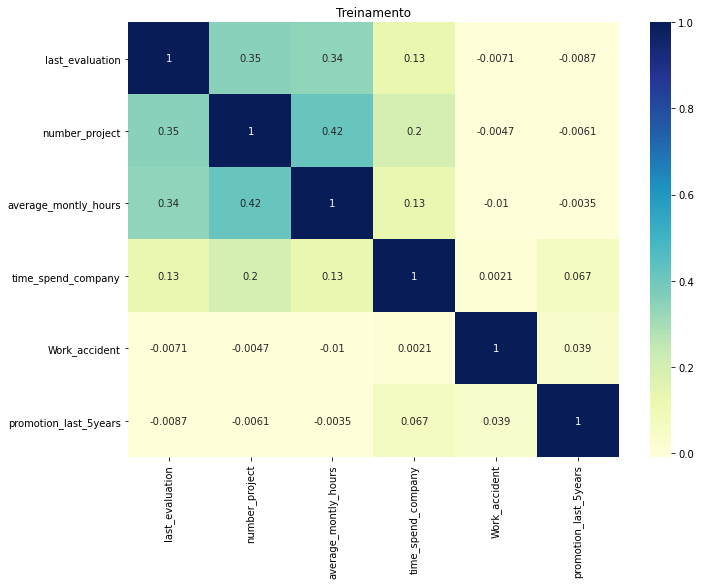

In [ ]:
corr = df[columns].corr()
ax = plt.subplots(figsize=(11, 8))
plt.title('Treinamento')
sns.heatmap(corr,  annot=True, annot_kws={"size": 10},cmap="YlGnBu");

## Aplicando o Modelo 1 - Random Forest



In [ ]:
seed = 42

df_model1 = df_preProcessing[columnsSelecionadas].copy()
df_model1 = df_model1.drop(['left_Company'],axis = 1)

X = df_model1.values
y = df_preProcessing['left_Company'].values # target data

# 70-25% of train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=seed)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9885    0.9906    0.9896      2868
           1     0.9692    0.9626    0.9659       882

    accuracy                         0.9840      3750
   macro avg     0.9788    0.9766    0.9777      3750
weighted avg     0.9840    0.9840    0.9840      3750

Acurácia:	 0.9840

ROC_AUC:	 0.9766



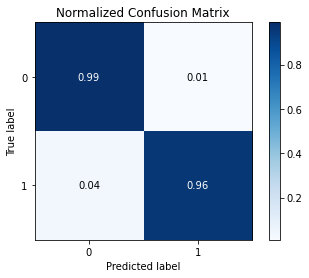

In [ ]:
model1_RF = RandomForestClassifier(random_state=seed)
model1_RF.fit(X_train, y_train)

# fazendo previsões
y_pred = model1_RF.predict(X_test)
y_proba = model1_RF.predict_proba(X_test)

# Relatório de Classificação
print('Relatório de Classificação:\n', classification_report(y_test, y_pred, digits=4))

# Acurácia
print('Acurácia:\t {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

# AUC
print('ROC_AUC:\t {:.4f}\n'.format(roc_auc_score(y_test, y_pred)))

# confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True);

### Variáveis Mais Importantes
Outra verificação interessante que podemos fazer é em relação às features (variáveis) mais importantes para o resultado do modelo.

In [ ]:
featuresRF = pd.DataFrame([df_model1.columns,model1_RF.feature_importances_])
featuresRF

,0,1,2,3,4,5,6,7
0,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,sales
1,0.187852,0.281185,0.254623,0.216839,0.0136182,0.00242653,0.0174366,0.0260202


In [ ]:
# calculando importância das features para Random Forest
feature_importances = pd.DataFrame(model1_RF.feature_importances_,
                                   index = df_model1.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances.reset_index(inplace=True)
feature_importances.rename(columns={"index": "features"}, inplace=True)

feature_importances['importance'] = round(feature_importances['importance'],2)
feature_importances

,features,importance
0,number_project,0.28
1,average_montly_hours,0.25
2,time_spend_company,0.22
3,last_evaluation,0.19
4,sales,0.03
5,salary,0.02
6,Work_accident,0.01
7,promotion_last_5years,0.00


In [ ]:
fig = go.Figure(data=[go.Bar(name= 'Features Importantes', x=feature_importances.features, y=feature_importances.importance, text=feature_importances.importance, textposition='auto')])
fig.update_layout(showlegend=False, height=400, width=1200, title_text='Importância das Features - Random Forest',  xaxis_title="Variáveis", yaxis_title="Importância") 
fig.show()

As features com mais importância para o Random Forest foram o Número de projetos (number_project), quantidade de horas mensais no trabalho (average_montly_hours), tempo gasto na empresa (time_spend_company) e última avaliação (last_evaluation). Juntas essas variáveis correspondem a 94% da importância para o modelo Random Forest

### Predizer quem irá sair da empresa

Para isso é necessário pegar todos os funcionários que estão na empresa [left_Company = 0]

In [ ]:
dfColunasSelecionadas = df_preProcessing[columnsSelecionadas].copy()

In [ ]:
df_NaoSair = dfColunasSelecionadas[dfColunasSelecionadas['left_Company']==0]
df_NaoSair = df_NaoSair.drop(['left_Company'],axis = 1)
X = df_NaoSair.values

In [ ]:
pred = model1_RF.predict_proba(X)

In [ ]:
df_NaoSair['Possibilidade Sair'] = pred[:,1]
df_NaoSair[df_NaoSair['Possibilidade Sair'] >=0.75]

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,sales,Possibilidade Sair
484,0.45,2,157,3,0,0,2,2,1.00
872,0.47,2,149,3,0,0,2,7,1.00
2357,0.52,2,148,3,0,0,0,7,0.93
4081,0.57,2,132,3,0,0,1,8,1.00
9840,0.82,5,249,6,0,0,1,6,0.88
9841,0.82,6,259,4,0,0,1,2,0.99
11222,0.87,4,244,5,0,0,1,7,0.99
11927,0.89,5,218,5,0,0,1,7,0.91
11973,0.89,5,218,5,0,0,1,7,0.91
12095,0.90,4,266,5,0,0,2,9,0.92


In [ ]:
df_aux = df_NaoSair[df_NaoSair['Possibilidade Sair'] >=0.75]
df_aux['Name'] = ''
for index in df_aux.index:
  df_aux.loc[index,'Name'] = df.loc[index]['Name']

df_aux = df_aux.sort_values(by=['Possibilidade Sair'], ascending=False)

In [ ]:
fig = go.Figure(data=[go.Bar(name= 'Funcionários em Risco', x=df_aux.Name, y=df_aux['Possibilidade Sair'], text=df_aux['Possibilidade Sair'], textposition='auto')])
fig.update_layout(showlegend=False, height=400, width=1200, title_text='Funcionários com mais de 75% de chance de sair',  xaxis_title="Nome", yaxis_title="Percentual de Sair") 
fig.show()

### Conclusão

* Podemos notar que temos 14 funcionários com mais de 75% de chance de saírem da empresa.
* Entre eles existem 4 funcionário com 100% de chance de sair da empresa.
* Algumas medidas podem ser tomadas pela empresa com o intuito de reter estes funcionários. Reuniões com estes funcionários para verificarem se realmente existe esta possibilidade e se sim, tentar reter o profissional.

## Aplicando o Modelo 2 - Random Forest - Todas as Features



* Importante notar que, foram feitos experimentos considerando todas as features e o modelo acertou 100%. Após análise, notei que as EMP_Engagement_{1 a 5} possuem correlação igual a 1 com a variável alvo. Com isso, optei por remove-las para evitar o overfitting do modelo. Portanto, o modelo agora não possui variáveis com correlação igual a 1 ou -1 com relação a variável alvo.
O ideal é remover variáveis com correlação superior a 0.7 ou -0.7 pois são consideradas fortes correlações.

### Pegar as Features de acordo com a Correlação em relação ao Target [left_Company]

In [ ]:
#Análise das Correlações
features= []
features_list = []

correlacoes = df_preProcessing.corr()
features = correlacoes[(correlacoes['left_Company'] != 1.0) & (correlacoes['left_Company'] != -1.000000)]['left_Company']
features = features.drop(['EMP_Engagement_2', 'ID'])

features_list = features.index.to_list()

#Faz uma copia e adiciona o target
features_list_with_target = []
features_list_with_target = features_list.copy()
features_list_with_target.append('left_Company')


In [ ]:
df_FeaturesCorrelacao = df_preProcessing[features_list_with_target]
df_FeaturesCorrelacao


,Department,GEO,Role,Will_Relocate,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest),left_Company
0,3,8,6,0,3,6,6,0.4,3.0,3.000000,4.000000,3.000000,5.000000,2,3,2,3,2,0.36,3,168,3,1,0,7,1,1,5,4,3,1,1,1,1,2,1,2,4,2,2,2,2,2,2,1,5,1841,61,9,0
1,4,7,4,0,3,6,6,0.4,3.0,3.000000,4.000000,3.000000,5.000000,2,3,2,3,2,0.36,5,159,2,0,0,2,1,0,58,3,3,4,3,2,1,2,1,2,2,1,4,1,3,2,5,1,5,1990,90,8,0
2,0,3,4,0,3,6,6,0.4,3.0,3.000000,4.000000,3.000000,5.000000,2,3,2,3,2,0.36,2,282,3,0,0,6,2,0,42,2,4,1,3,1,1,2,2,1,5,1,2,5,2,2,4,4,4,3193,80,8,0
3,1,1,4,0,3,6,6,0.4,3.0,3.000000,4.000000,3.000000,5.000000,2,3,2,3,2,0.36,4,278,4,1,0,6,0,1,37,3,1,4,5,2,1,2,1,1,1,2,5,1,1,2,4,4,1,3248,77,6,0
4,2,5,0,0,3,6,6,0.4,3.0,3.000000,4.000000,3.000000,5.000000,2,3,2,3,2,0.36,6,256,5,0,0,7,1,0,6,4,5,4,5,1,1,2,1,1,4,1,5,3,5,1,2,5,4,3149,80,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,3,5,2,1,3,6,6,1.0,3.0,2.731962,3.731962,2.731962,3.943649,5,5,4,5,4,1.00,4,252,5,0,0,9,2,0,1,1,2,2,2,2,1,2,1,1,1,2,3,2,4,2,2,3,1,1538,88,9,1
14995,4,0,2,1,3,6,6,1.0,3.0,2.731962,3.731962,2.731962,3.943649,5,5,4,5,4,1.00,4,232,5,0,0,9,2,0,6,1,1,2,4,1,2,2,1,1,5,1,4,4,3,1,4,5,5,1247,89,4,1
14996,0,1,2,0,3,6,6,1.0,3.0,2.731962,3.731962,2.731962,3.943649,5,5,4,5,4,1.00,5,242,5,0,0,7,1,0,4,4,3,1,5,1,1,2,1,2,2,1,2,4,4,2,3,4,5,1155,88,2,1
14997,1,8,2,0,3,6,6,1.0,3.0,2.731962,3.731962,2.731962,3.943649,5,5,4,5,4,1.00,5,223,6,0,0,2,2,1,2,2,2,3,2,1,2,1,1,1,1,2,1,5,2,1,3,5,1,1210,86,5,1


In [ ]:
df_model2 = df_FeaturesCorrelacao.copy()
df_model2 = df_model2.drop(['left_Company'],axis = 1)

X = df_model2.values
y = df_FeaturesCorrelacao['left_Company'].values # target data

# 70-25% of train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=seed)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9951    0.9979    0.9965      2868
           1     0.9931    0.9841    0.9886       882

    accuracy                         0.9947      3750
   macro avg     0.9941    0.9910    0.9926      3750
weighted avg     0.9947    0.9947    0.9947      3750

Acurácia:	 0.9947

ROC_AUC:	 0.9910



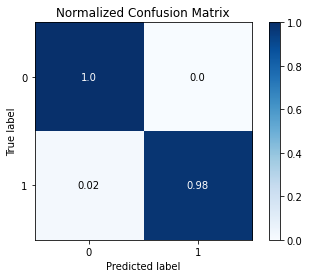

In [ ]:
model2_RF = RandomForestClassifier(random_state=seed)
model2_RF.fit(X_train, y_train)

# fazendo previsões
y_pred = model2_RF.predict(X_test)
y_proba = model2_RF.predict_proba(X_test)

# Relatório de Classificação
print('Relatório de Classificação:\n', classification_report(y_test, y_pred, digits=4))

# Acurácia
print('Acurácia:\t {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

# AUC
print('ROC_AUC:\t {:.4f}\n'.format(roc_auc_score(y_test, y_pred)))

# confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True);

In [ ]:
featuresRF = pd.DataFrame([df_model2.columns,model2_RF.feature_importances_])
featuresRF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,Department,GEO,Role,Will_Relocate,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
1,0.00154432,0.00235858,0.0020837,0.000638829,0,0,0,0.0390242,0,0.0102153,0.00789721,0.0108031,0.0276015,0.0126407,0.00815732,0.0119377,0.00813767,0.00984032,0.0601204,0.143924,0.125578,0.0459621,0.00313163,0.000562595,0.00294666,0.0145518,0.000604341,0.0256908,0.00141694,0.00165501,0.00160955,0.0015083,0.0319206,0.0280475,0.0149914,0.0151705,0.0155117,0.00185016,0.0151092,0.00169526,0.00148901,0.0015993,0.000937991,0.00174452,0.00142309,0.00168959,0.177736,0.0982116,0.00872935


In [ ]:
# calculando importância das features para Random Forest
feature_importances = pd.DataFrame(model2_RF.feature_importances_,
                                   index = df_model2.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances.reset_index(inplace=True)
feature_importances.rename(columns={"index": "features"}, inplace=True)

feature_importances['importance'] = round(feature_importances['importance'],2)


In [ ]:
feature_importances = feature_importances[feature_importances['importance'] > 0.01]

fig = go.Figure(data=[go.Bar(name= 'Features Importantes', x=feature_importances.features, y=feature_importances.importance, text=feature_importances.importance, textposition='auto')])
fig.update_layout(showlegend=False, height=400, width=1200, title_text='Importância das Features - Random Forest',  xaxis_title="Variáveis", yaxis_title="Importância") 
fig.show()

### Conclusão

* Podemos notar que utilizando todas as variáveis disponíveis houve um ligeiro aumento na acurácia do modelo. 
* Além disso, as variáveis encontradas no primeiro modelo continuam aparecendo no segundo modelo: projetos (number_project), quantidade de horas mensais no trabalho (average_montly_hours), tempo gasto na empresa (time_spend_company) e última avaliação (last_evaluation).


## Considerações Finais

* Através das variáveis mais importantes, podemos tomar decisões e consequentemente agir preventivamente para tentar reduzir a saída de bons funcionários.

* Exitem variáveis que estão relacionadas a carreira, benefícios e carga horária. Estas podem representar os sentimentos do funcionário com relação a empresa.

* Com a ajuda de outros setores da empresa é possível entender melhor o contexto em que a empresa se encontra e assim otimizar os modelos.

